In [19]:
import numpy as np
import pandas as pd
from importlib import reload
import amazon_parsing as ap
import ai_functions as aif
import seaborn as sns
import matplotlib.pyplot as plt
#reload(ap)

## Import Amazon product data and reviews
- Data description: https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/


In [25]:
json_parser = ap.AmazonJSONParser()
product_data = json_parser.parser('./input/meta_AMAZON_FASHION.json')
review_data = json_parser.parser('./input/AMAZON_FASHION.json')

## Data cleaning

In [26]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186637 entries, 0 to 186636
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            186632 non-null  object
 1   brand            139957 non-null  object
 2   feature          123875 non-null  object
 3   rank             180222 non-null  object
 4   date             185001 non-null  object
 5   asin             186637 non-null  object
 6   imageURL         132017 non-null  object
 7   imageURLHighRes  132017 non-null  object
 8   description      15869 non-null   object
 9   price            17799 non-null   object
 10  also_view        11595 non-null   object
 11  also_buy         21642 non-null   object
 12  fit              4831 non-null    object
 13  details          885 non-null     object
 14  similar_item     317 non-null     object
 15  tech1            97 non-null      object
dtypes: object(16)
memory usage: 22.8+ MB


In [27]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         883636 non-null  int64  
 1   verified        883636 non-null  bool   
 2   reviewTime      883636 non-null  object 
 3   reviewerID      883636 non-null  object 
 4   asin            883636 non-null  object 
 5   reviewerName    883544 non-null  object 
 6   reviewText      882403 non-null  object 
 7   summary         883103 non-null  object 
 8   unixReviewTime  883636 non-null  int64  
 9   vote            79900 non-null   float64
 10  style           304569 non-null  object 
 11  image           28807 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 75.0+ MB


Nearly every variable is qualitative. From the product_data data frame, price will be converted to numeric. From the review_data data frame, unixReviewTime will be converted to datetime.

The required variable to merge the datasets is asin. The required variables for the predicted outcome are overall, unixReviewTime, and rank.

NLP is required on feature, description, and reviewText. NLP will extract: product features, key sentiments, and an overall sentiment rating.

In [28]:
# Clean numeric columns
product_data['price'] = product_data['price'].str.replace('$','')
product_data['price'] = product_data['price'].str.replace(',','')

multi_price_mask = product_data['price'].str.contains(r'[^0-9.]', na=False)
product_data['price'][multi_price_mask].value_counts()

price
16.99 - 19.99     59
44.95 - 149.99    21
29.18 - 89.93     19
11.99 - 19.99     14
8.01 - 42.00      12
                  ..
8.11 - 18.99       1
3.99 - 27.99       1
5.00 - 25.58       1
19.64 - 26.00      1
34.45 - 45.00      1
Name: count, Length: 2087, dtype: int64

In [29]:
# Take max price, since lower price is often a promotion for less popular items
product_data['price'] = np.where(
    multi_price_mask,
    product_data['price'].str.split('- ', expand=True)[1],
    product_data['price']
)
product_data['price'] = product_data['price'].astype(float)

## EDA

<Figure size 640x480 with 0 Axes>

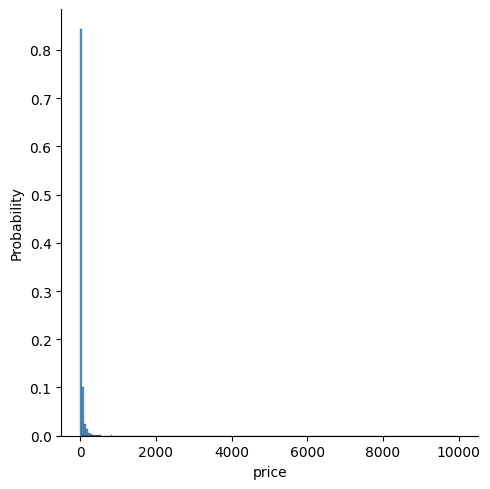

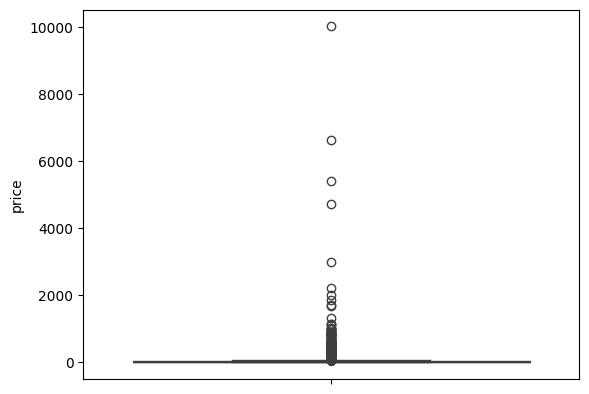

,price
count,17798.000000
mean,37.220052
std,127.466392
min,0.010000
25%,10.490000
50%,18.690000
75%,35.000000
max,10020.000000


In [34]:
plt.clf()

#sns.displot(product_data['rank'], stat='probability')
sns.displot(product_data['price'],
            stat='probability',
            bins=200) 
plt.show()

sns.boxplot(product_data['price'])
plt.show()

product_data.describe()

In [31]:
# Drop high outlier of price

product_data = product_data[product_data['price'] < 69990]

## EDA summary 

### JA results

**From my own EDA, it appears that:**
- X
- X

**Next steps**
- X

### LLM results

## Implement transformations and feature engineering

## Model specifications

I am trying to predict product success defined as:
- A rating above 4 stars one month after launch
- A rating above 4 starts one month after launch and high engagment (above the median number of reviews)
- A sales rank in the top 25% of a given product category
- A rating above 4.75 starts one month after launch

## Model evaluation



In [11]:
from IPython.display import Markdown, display

display(Markdown(f"## Final model selection test test \
                My optimal approach would be X.  \
                 The LLM's optimal approach would be:"))

## Final model selection test test                 My optimal approach would be X.  